In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
results=pd.read_csv("results.csv")
results.head()

,Season_End_Year,Wk,Date,home_team,home_goals,away_goals,away_team,result
0,2021,1,12-09-2020,Fulham,0,3,Arsenal,A
1,2021,1,12-09-2020,Crystal Palace,1,0,Southampton,H
2,2021,1,12-09-2020,Liverpool,4,3,Leeds United,H
3,2021,1,12-09-2020,West Ham,0,2,Newcastle Utd,A
4,2021,1,13-09-2020,West Brom,0,3,Leicester City,A


In [13]:
# prompt: add one column named ftr which shows if result is A it is away_team from away_team column, if result H it is home_team from home_team column and if result is D which is draw

results['ftr'] = np.select(
    [results['result'] == 'A', results['result'] == 'H', results['result'] == 'D'],
    [results['away_team'], results['home_team'], 'Draw'],
    default='Unknown'
)
results.head(100)


,Season_End_Year,Wk,Date,home_team,home_goals,away_goals,away_team,result,ftr
0,2021,1,12-09-2020,Fulham,0,3,Arsenal,A,Arsenal
1,2021,1,12-09-2020,Crystal Palace,1,0,Southampton,H,Crystal Palace
2,2021,1,12-09-2020,Liverpool,4,3,Leeds United,H,Liverpool
3,2021,1,12-09-2020,West Ham,0,2,Newcastle Utd,A,Newcastle Utd
4,2021,1,13-09-2020,West Brom,0,3,Leicester City,A,Leicester City
...,...,...,...,...,...,...,...,...,...
95,2021,10,29-11-2020,Arsenal,1,2,Wolves,A,Wolves
96,2021,10,30-11-2020,Leicester City,1,2,Fulham,A,Fulham
97,2021,10,30-11-2020,West Ham,2,1,Aston Villa,H,West Ham
98,2021,11,05-12-2020,Burnley,1,1,Everton,D,Draw


In [14]:
# prompt: create a new column called total_goals which is by adding values in home_goals and away_goals

results['total_goals'] = results['home_goals'] + results['away_goals']
results.head()

,Season_End_Year,Wk,Date,home_team,home_goals,away_goals,away_team,result,ftr,total_goals
0,2021,1,12-09-2020,Fulham,0,3,Arsenal,A,Arsenal,3
1,2021,1,12-09-2020,Crystal Palace,1,0,Southampton,H,Crystal Palace,1
2,2021,1,12-09-2020,Liverpool,4,3,Leeds United,H,Liverpool,7
3,2021,1,12-09-2020,West Ham,0,2,Newcastle Utd,A,Newcastle Utd,2
4,2021,1,13-09-2020,West Brom,0,3,Leicester City,A,Leicester City,3


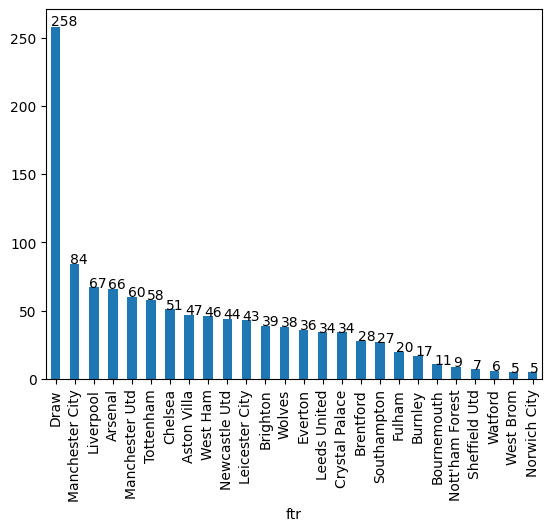

In [15]:
# prompt: bar chart which is about ftr and label the counts on top of the bars

ax = results['ftr'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

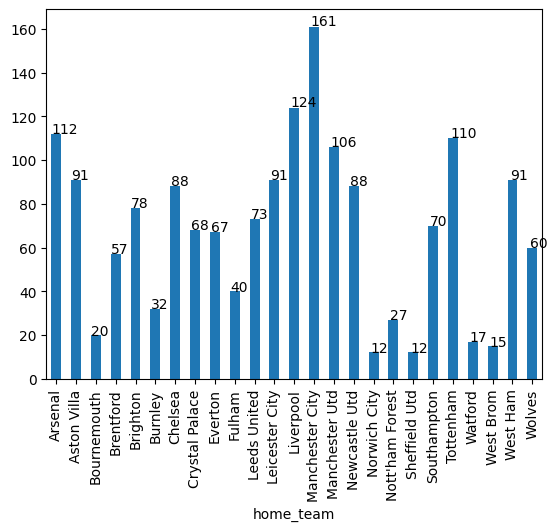

In [16]:
# prompt: make a bar chart with home_team and home goals

ax = results.groupby('home_team')['home_goals'].sum().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

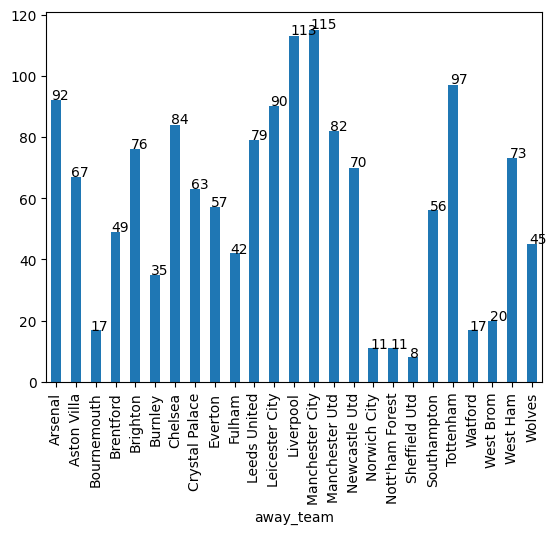

In [17]:
# prompt: make a bar chart with home_team and home goals

ax = results.groupby('away_team')['away_goals'].sum().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [18]:
results['total_goals'].sum()

3179

In [19]:
results.head()

,Season_End_Year,Wk,Date,home_team,home_goals,away_goals,away_team,result,ftr,total_goals
0,2021,1,12-09-2020,Fulham,0,3,Arsenal,A,Arsenal,3
1,2021,1,12-09-2020,Crystal Palace,1,0,Southampton,H,Crystal Palace,1
2,2021,1,12-09-2020,Liverpool,4,3,Leeds United,H,Liverpool,7
3,2021,1,12-09-2020,West Ham,0,2,Newcastle Utd,A,Newcastle Utd,2
4,2021,1,13-09-2020,West Brom,0,3,Leicester City,A,Leicester City,3


In [20]:
#encode Team names to short
results.home_team.unique()

array(['Fulham', 'Crystal Palace', 'Liverpool', 'West Ham', 'West Brom',
       'Tottenham', 'Sheffield Utd', 'Brighton', 'Everton',
       'Leeds United', 'Manchester Utd', 'Arsenal', 'Southampton',
       'Newcastle Utd', 'Chelsea', 'Leicester City', 'Aston Villa',
       'Wolves', 'Burnley', 'Manchester City', 'Brentford', 'Watford',
       'Norwich City', 'Bournemouth', "Nott'ham Forest"], dtype=object)

In [21]:
team_names={'home_team':{'Liverpool':1, 'West Ham':2, 'Crystal Palace':3, 'Bournemouth':4,
       'Burnley':5, 'Watford':6, 'Tottenham':7, 'Leicester City':8,
       'Newcastle Utd':9, 'Manchester Utd':10, 'Arsenal':11, 'Brighton':12,
       'Norwich City':13, 'Aston Villa':14, 'Everton':15, 'Southampton':16,
       'Manchester City':17, 'Sheffield Utd':18, 'Chelsea':19, 'Wolves':20, 'Fulham':21,
       'West Brom':22, 'Leeds United':23, 'Brentford':24, "Nott'ham Forest":25}}
results.replace(team_names,inplace=True)
results.head(100)

,Season_End_Year,Wk,Date,home_team,home_goals,away_goals,away_team,result,ftr,total_goals
0,2021,1,12-09-2020,21,0,3,Arsenal,A,Arsenal,3
1,2021,1,12-09-2020,3,1,0,Southampton,H,Crystal Palace,1
2,2021,1,12-09-2020,1,4,3,Leeds United,H,Liverpool,7
3,2021,1,12-09-2020,2,0,2,Newcastle Utd,A,Newcastle Utd,2
4,2021,1,13-09-2020,22,0,3,Leicester City,A,Leicester City,3
...,...,...,...,...,...,...,...,...,...,...
95,2021,10,29-11-2020,11,1,2,Wolves,A,Wolves,3
96,2021,10,30-11-2020,8,1,2,Fulham,A,Fulham,3
97,2021,10,30-11-2020,2,2,1,Aston Villa,H,West Ham,3
98,2021,11,05-12-2020,5,1,1,Everton,D,Draw,2


In [22]:
team_names={'away_team':{'Liverpool':1, 'West Ham':2, 'Crystal Palace':3, 'Bournemouth':4,
       'Burnley':5, 'Watford':6, 'Tottenham':7, 'Leicester City':8,
       'Newcastle Utd':9, 'Manchester Utd':10, 'Arsenal':11, 'Brighton':12,
       'Norwich City':13, 'Aston Villa':14, 'Everton':15, 'Southampton':16,
       'Manchester City':17, 'Sheffield Utd':18, 'Chelsea':19, 'Wolves':20, 'Fulham':21,
       'West Brom':22, 'Leeds United':23, 'Brentford':24, "Nott'ham Forest":25}}
results.replace(team_names,inplace=True)
results.head(100)

,Season_End_Year,Wk,Date,home_team,home_goals,away_goals,away_team,result,ftr,total_goals
0,2021,1,12-09-2020,21,0,3,11,A,Arsenal,3
1,2021,1,12-09-2020,3,1,0,16,H,Crystal Palace,1
2,2021,1,12-09-2020,1,4,3,23,H,Liverpool,7
3,2021,1,12-09-2020,2,0,2,9,A,Newcastle Utd,2
4,2021,1,13-09-2020,22,0,3,8,A,Leicester City,3
...,...,...,...,...,...,...,...,...,...,...
95,2021,10,29-11-2020,11,1,2,20,A,Wolves,3
96,2021,10,30-11-2020,8,1,2,21,A,Fulham,3
97,2021,10,30-11-2020,2,2,1,14,H,West Ham,3
98,2021,11,05-12-2020,5,1,1,15,D,Draw,2


In [23]:
# prompt: get the datatypes of columns

results.dtypes


Season_End_Year     int64
Wk                  int64
Date               object
home_team           int64
home_goals          int64
away_goals          int64
away_team           int64
result             object
ftr                object
total_goals         int64
dtype: object

In [24]:
results.head(300)

,Season_End_Year,Wk,Date,home_team,home_goals,away_goals,away_team,result,ftr,total_goals
0,2021,1,12-09-2020,21,0,3,11,A,Arsenal,3
1,2021,1,12-09-2020,3,1,0,16,H,Crystal Palace,1
2,2021,1,12-09-2020,1,4,3,23,H,Liverpool,7
3,2021,1,12-09-2020,2,0,2,9,A,Newcastle Utd,2
4,2021,1,13-09-2020,22,0,3,8,A,Leicester City,3
...,...,...,...,...,...,...,...,...,...,...
295,2021,30,04-04-2021,9,2,2,7,D,Draw,4
296,2021,30,04-04-2021,14,3,1,21,H,Aston Villa,4
297,2021,30,04-04-2021,10,2,1,12,H,Manchester Utd,3
298,2021,30,05-04-2021,15,1,1,3,D,Draw,2


In [25]:
results.result.unique()

array(['A', 'H', 'D'], dtype=object)

In [26]:
results.replace(['D'],[0],inplace=True)
results.head()

,Season_End_Year,Wk,Date,home_team,home_goals,away_goals,away_team,result,ftr,total_goals
0,2021,1,12-09-2020,21,0,3,11,A,Arsenal,3
1,2021,1,12-09-2020,3,1,0,16,H,Crystal Palace,1
2,2021,1,12-09-2020,1,4,3,23,H,Liverpool,7
3,2021,1,12-09-2020,2,0,2,9,A,Newcastle Utd,2
4,2021,1,13-09-2020,22,0,3,8,A,Leicester City,3


In [27]:
results.result.loc[results['result']=='H']=results['home_team']
results.result.loc[results['result']=='A']=results['away_team']
results.head()

<ipython-input-27-f2db33e374c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.result.loc[results['result']=='H']=results['home_team']
<ipython-input-27-f2db33e374c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.result.loc[results['result']=='A']=results['away_team']


,Season_End_Year,Wk,Date,home_team,home_goals,away_goals,away_team,result,ftr,total_goals
0,2021,1,12-09-2020,21,0,3,11,11,Arsenal,3
1,2021,1,12-09-2020,3,1,0,16,3,Crystal Palace,1
2,2021,1,12-09-2020,1,4,3,23,1,Liverpool,7
3,2021,1,12-09-2020,2,0,2,9,9,Newcastle Utd,2
4,2021,1,13-09-2020,22,0,3,8,8,Leicester City,3


In [28]:
results.dtypes

Season_End_Year     int64
Wk                  int64
Date               object
home_team           int64
home_goals          int64
away_goals          int64
away_team           int64
result             object
ftr                object
total_goals         int64
dtype: object

In [29]:
#COUNTINGS MATCHES
from collections import Counter

c =Counter(list(results.home_team))
c1=Counter(list(results.away_team))
d1=dict(c1)
key1=list(c1.keys())
value1=list(c1.values())
d=dict(c)
key=list(c.keys())
value=list(c.values())
for x in range(1,25):
    value1[x]=value[x]+value1[x]



In [30]:
# prompt: code to count total number of wins in result column

results['result'].value_counts()[4]


11

In [31]:
#COUNTING DRAWS
draws=results.groupby('result')
dd=draws.get_group(0)
c4 = Counter(list(dd.home_team))
c5=Counter(list(dd.away_team))
d4=dict(c4)
key4=list(c4.keys())
value4=list(c4.values())
d5=dict(c5)
key5=list(c5.keys())
value5=list(c5.values())
for x in range(1,25):
    value5[x]=value5[x]+value4[x]
value5

[12,
 21,
 29,
 24,
 32,
 12,
 37,
 23,
 23,
 15,
 27,
 19,
 29,
 24,
 10,
 26,
 31,
 18,
 25,
 26,
 10,
 14,
 6,
 9,
 8]

In [32]:
def getDetails(k):
    if k in key:
        print("Team Name:- "+str(list(dicVal.keys())[list(dicVal.values()).index(k)]))
        print("Total Matches till Date:- "+str(matches.get_value(k,'matches')))
        print("Total wins till Date:- "+str(matches.get_value(k,'wins')))
        print("Total losses till Date:- "+str(matches.get_value(k,'loss')))
        print("Total draws till Date:- "+str(matches.get_value(k,'draw')))

In [33]:
def start():
    n=int(input("Enter team id:- "))
    getDetails(n)

In [34]:
results.head()

,Season_End_Year,Wk,Date,home_team,home_goals,away_goals,away_team,result,ftr,total_goals
0,2021,1,12-09-2020,21,0,3,11,11,Arsenal,3
1,2021,1,12-09-2020,3,1,0,16,3,Crystal Palace,1
2,2021,1,12-09-2020,1,4,3,23,1,Liverpool,7
3,2021,1,12-09-2020,2,0,2,9,9,Newcastle Utd,2
4,2021,1,13-09-2020,22,0,3,8,8,Leicester City,3


In [35]:
# prompt: check null values in adataframe

results.isnull().sum().sum()


0

In [36]:
results.head()

,Season_End_Year,Wk,Date,home_team,home_goals,away_goals,away_team,result,ftr,total_goals
0,2021,1,12-09-2020,21,0,3,11,11,Arsenal,3
1,2021,1,12-09-2020,3,1,0,16,3,Crystal Palace,1
2,2021,1,12-09-2020,1,4,3,23,1,Liverpool,7
3,2021,1,12-09-2020,2,0,2,9,9,Newcastle Utd,2
4,2021,1,13-09-2020,22,0,3,8,8,Leicester City,3


In [37]:
# prompt: remove Season_End_Year, Wk, Date columns

results = results.drop(['Season_End_Year', 'Wk', 'Date','ftr','total_goals'], axis=1)


In [38]:
results.head()

,home_team,home_goals,away_goals,away_team,result
0,21,0,3,11,11
1,3,1,0,16,3
2,1,4,3,23,1
3,2,0,2,9,9
4,22,0,3,8,8


In [39]:
# prompt: change D in result column to 0

results.replace(['D'],[0],inplace=True)
results.head()


,home_team,home_goals,away_goals,away_team,result
0,21,0,3,11,11
1,3,1,0,16,3
2,1,4,3,23,1
3,2,0,2,9,9
4,22,0,3,8,8


***SPLITTING THE DATASET***

In [40]:
from sklearn.model_selection import train_test_split

In [41]:


# Load data
data = results

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['home_team', 'away_team']], data['result'], test_size = 0.2, random_state = 42)



In [42]:
#Import models from scikit learn module:

from sklearn.linear_model import LogisticRegression
  #For K-fold cross validation

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict


#Generic function for making a classification model and accessing performance:

def class_model(model, data, predictors, outcome):


  model.fit(data[predictors],data[outcome])

  predictions = model.predict(data[predictors])

  accuracy = metrics.accuracy_score(predictions,data[outcome])

  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

  model.fit(data[predictors],data[outcome])

In [43]:
# prompt: make a randomforest classifier model using outcome_var as 'result' and predictor_var as 'home_team' and 'away_team'

model = RandomForestClassifier(n_estimators=100)

class_model(model, results, predictors=['home_team','away_team'], outcome='result')


Accuracy : 74.123%


In [44]:
# Import the KNeighborsClassifier class
from sklearn.neighbors import KNeighborsClassifier

# Create a new KNeighborsClassifier object
model = KNeighborsClassifier(n_neighbors=5)

# Call the class_model function with the KNeighborsClassifier object
class_model(model, results, predictors=['home_team', 'away_team'], outcome='result')

Accuracy : 58.947%


In [45]:
model = LogisticRegression()

outcome_var = ['result']

predictor_var = ['home_team','away_team']

class_model(model, results,predictor_var,outcome_var)

Accuracy : 22.368%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [46]:
model = GaussianNB()

outcome_var = ['result']

predictor_var = ['home_team','away_team']

class_model(model, results,predictor_var,outcome_var)

Accuracy : 23.421%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
# prompt: make a randomforest classifier model using outcome_var as 'result' and predictor_var as 'home_team' and 'away_team'

model = RandomForestClassifier(n_estimators=100)

class_model(model, results, predictors=['home_team','away_team'], outcome='result')


Accuracy : 74.123%


In [48]:
# prompt: code to do artificial neural network model

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)

class_model(model, results, predictors=['home_team','away_team'], outcome='result')


Accuracy : 29.386%


In [49]:
# prompt: code to do K nearest neighbours model

model = KNeighborsClassifier(n_neighbors=5)

class_model(model, results, predictors=['home_team','away_team'], outcome='result')


Accuracy : 58.947%


In [50]:
# prompt: code to do Boosting and AdaBoost model

from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()

class_model(model, results, predictors=['home_team','away_team'], outcome='result')

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

class_model(model, results, predictors=['home_team','away_team'], outcome='result')


Accuracy : 25.000%
Accuracy : 73.246%


In [51]:
# prompt: code to do xgboost model

from xgboost import XGBClassifier

model = XGBClassifier()

class_model(model, results, predictors=['home_team','away_team'], outcome='result')


Accuracy : 74.035%


In [52]:
# prompt: code to do decision tree model
model = DecisionTreeClassifier()
class_model(model, results, predictors=['home_team','away_team'], outcome='result')

Accuracy : 74.123%


In [53]:
# prompt: code to check the decision tree is overfittiing or not
from sklearn.model_selection import cross_val_score
# Create a decision tree classifier
model = DecisionTreeClassifier()
# Perform cross-validation
scores = cross_val_score(model, results[['home_team','away_team']], results['result'], cv=5)
# Check if the model is overfitting
if scores.std() > 0.1:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")


The model is not overfitting.


In [54]:
results.head()

,home_team,home_goals,away_goals,away_team,result
0,21,0,3,11,11
1,3,1,0,16,3
2,1,4,3,23,1
3,2,0,2,9,9
4,22,0,3,8,8
